In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.describe

<bound method NDFrame.describe of                  area_type   availability                  location  \
0      Super built-up Area         19-Dec  Electronic City Phase II   
1                Plot Area  Ready To Move          Chikka Tirupathi   
2            Built-up Area  Ready To Move               Uttarahalli   
3      Super built-up Area  Ready To Move        Lingadheeranahalli   
4      Super built-up Area  Ready To Move                  Kothanur   
...                    ...            ...                       ...   
13315        Built-up Area  Ready To Move                Whitefield   
13316  Super built-up Area  Ready To Move             Richards Town   
13317        Built-up Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up Area         18-Jun           Padmanabhanagar   
13319  Super built-up Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
#Data clean: handle null values
data = data.dropna()

In [7]:
data.area_type.unique()

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

In [8]:
#drop availability because it's not required 
data = data.drop('availability',axis=1)

In [9]:
# data.location.unique()

In [10]:
len(data.location.unique())

634

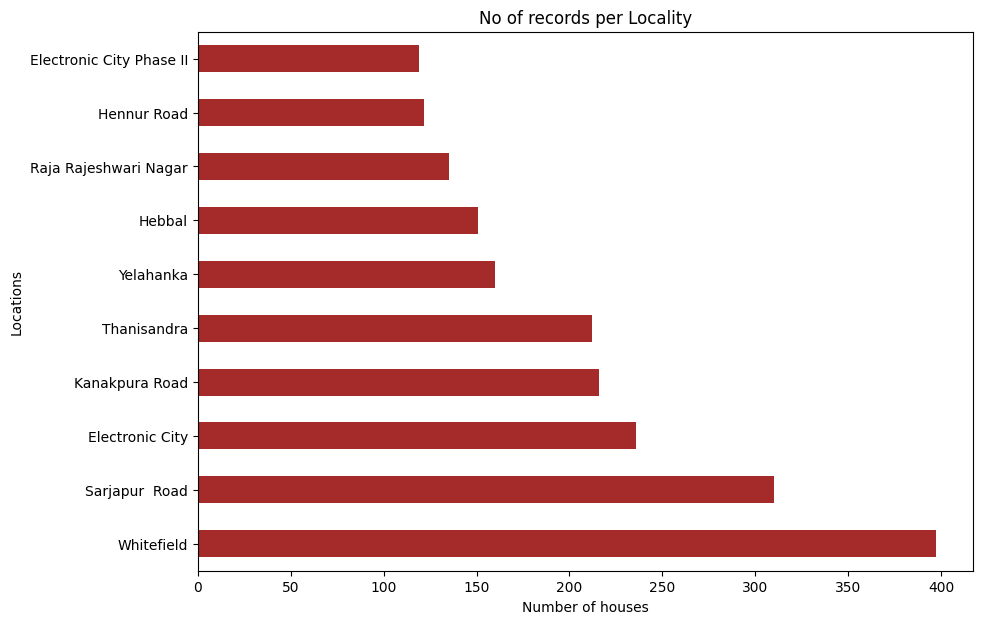

In [11]:
location_count = data.groupby('location').size().sort_values(ascending=False)
location_count[0:10]
plt.figure(figsize=(10,7))
location_count[0:10].plot(kind='barh', color = "brown")
plt.xlabel('Number of houses')
plt.ylabel('Locations')
plt.title('No of records per Locality')
plt.show()

In [12]:
len(location_count[location_count<=10])

491

In [13]:
location_less_10 = location_count[location_count<=10]

In [14]:
#if the location have less than 10 or 10 houses than that location are known as other location
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [15]:
len(data.location.unique())

144

In [16]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique() 

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [19]:
#drop society column because it's not required
data = data.drop('society',axis=1)

In [20]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4


In [21]:
#create new column price_sqft that contain price per sqft
data['price_sqft'] = data.price*100000/data.total_sqft
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605


In [22]:
#remove outlier using standard deviation
upper_limit = data.price_sqft.mean() + data.price_sqft.std()
lower_limit = data.price_sqft.mean() - data.price_sqft.std()
data = data[data.price_sqft<upper_limit] 
data = data[data.price_sqft > lower_limit]

In [23]:
#remove 2BHK house that price per sqft is less than the mean of 1bhk house price
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)

In [24]:
data = data.drop('price_sqft',axis=1)

In [25]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [26]:
#apply one hot encoding in location column
dummies = pd.get_dummies(data.location)
location_cat = pd.get_dummies(data.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data = pd.concat([data,dummies.drop('1st Phase JP Nagar',axis='columns')],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,0,0,...,0,0,0,0,0,1,0,0,0,0
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#apply one hot encoding in area column
dummies = pd.get_dummies(data.area_type)
dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
3,0,0,0,1
11,0,0,1,0
12,0,0,0,1


In [29]:
data = pd.concat([data,dummies],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,0,0,...,0,0,0,0,0,0,0,0,0,1
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,0,0,...,0,1,0,0,0,0,0,0,1,0
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,0,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
data = data.drop(['location','size','area_type'] , axis=1)

In [31]:
data.head(10)

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2600.0,5.0,3.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2785.0,5.0,3.0,295.00,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
12,1000.0,2.0,1.0,38.00,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,2250.0,3.0,2.0,148.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15,1175.0,2.0,2.0,73.50,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,1180.0,3.0,2.0,48.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,2770.0,4.0,2.0,290.00,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21,1755.0,3.0,1.0,122.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# convert bhk into float
# data.bhk = data.bhk.astype(float)

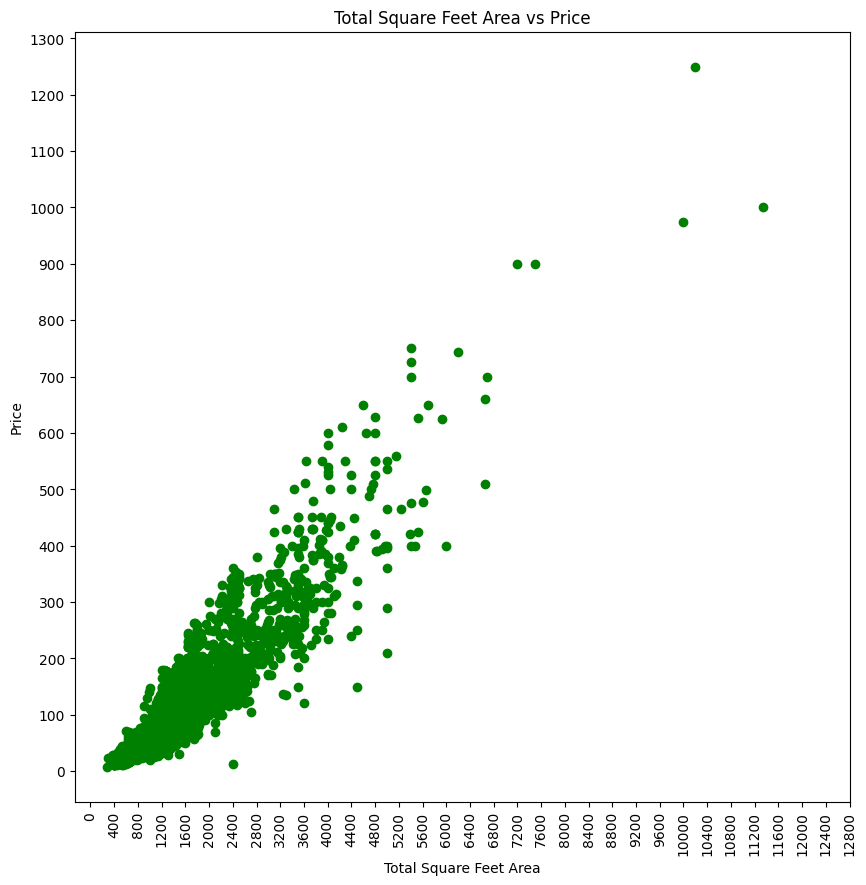

In [33]:
# squarefit vs price bar graph with 500 scale
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(data.total_sqft,data.price,color = "green")
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price")
plt.title("Total Square Feet Area vs Price")
plt.xticks(np.arange(0, 13000, 400))
plt.yticks(np.arange(0, 1400, 100))
plt.xticks(rotation=90)
plt.show()

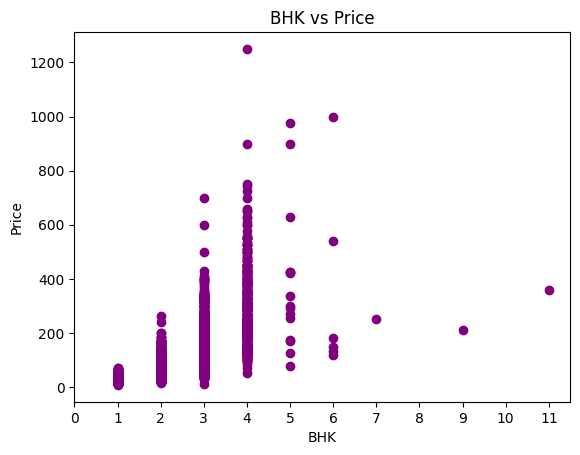

In [34]:
plt.scatter(data.bhk,data['price'],color='purple')
plt.xlabel("BHK")
plt.ylabel("Price")
plt.xticks(range(0,12,1))
plt.title("BHK vs Price")
plt.show()

Text(0.5, 1.0, 'Number of bath per bhk')

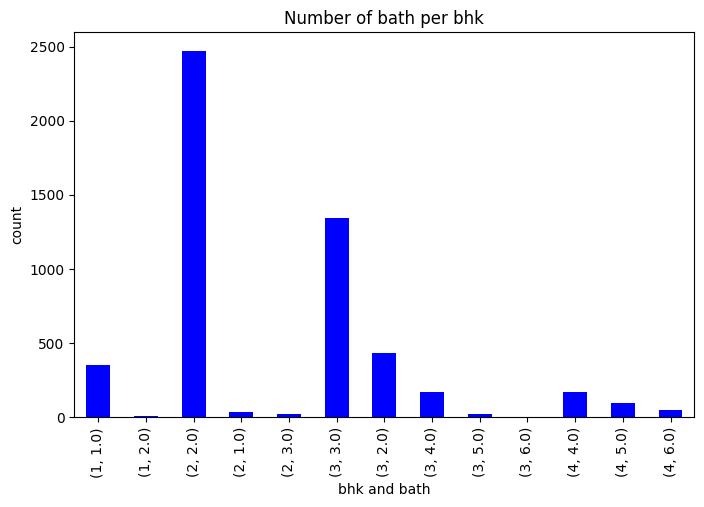

In [35]:
# show number of bath per bhk
plt = data.groupby('bhk')['bath'].value_counts()[0:13].plot(kind='bar', figsize=(8,5), color='blue')
plt.set_xlabel('bhk and bath')
plt.set_ylabel('count')
plt.set_title('Number of bath per bhk')


In [36]:
#split data into dependent feature & independent feature
X = data.drop('price',axis=1)

In [37]:
y=data['price']

In [38]:
#split data into train-test split
# randomFOrestregressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.90264951, 0.89014555, 0.86736688, 0.89276874, 0.87845573])

In [39]:
np.average(regressor)

0.8862772833440113

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [41]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9028735900271909

APPLY RANDOMFOREST


In [43]:
random = RandomForestRegressor()
random.fit(x_train , y_train)

RandomForestRegressor()

In [44]:
y_pred_random = random.predict(x_test)
r2_score(y_test , y_pred_random)

0.8871132768952242

Apply xgboost

In [45]:
xg = XGBRegressor()
xg.fit(x_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
y_pred_xg = xg.predict(x_test)
r2_score(y_test , y_pred_xg)

0.9017856713320668

Apply Catboost

In [47]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(x_train, y_train)

Learning rate set to 0.050274
0:	learn: 81.1812442	total: 142ms	remaining: 2m 22s
1:	learn: 78.4133302	total: 144ms	remaining: 1m 12s
2:	learn: 75.5784230	total: 146ms	remaining: 48.7s
3:	learn: 72.9840171	total: 148ms	remaining: 37s
4:	learn: 70.6287502	total: 150ms	remaining: 29.8s
5:	learn: 68.3224222	total: 152ms	remaining: 25.2s
6:	learn: 66.1643297	total: 154ms	remaining: 21.8s
7:	learn: 64.1082077	total: 156ms	remaining: 19.3s
8:	learn: 62.1741044	total: 158ms	remaining: 17.4s
9:	learn: 60.3180463	total: 160ms	remaining: 15.9s
10:	learn: 58.7750971	total: 162ms	remaining: 14.6s
11:	learn: 57.1589615	total: 165ms	remaining: 13.5s
12:	learn: 55.6374623	total: 167ms	remaining: 12.7s
13:	learn: 54.0985013	total: 169ms	remaining: 11.9s
14:	learn: 52.7592663	total: 171ms	remaining: 11.2s
15:	learn: 51.4277449	total: 174ms	remaining: 10.7s
16:	learn: 50.1328181	total: 176ms	remaining: 10.2s
17:	learn: 49.0638863	total: 178ms	remaining: 9.72s
18:	learn: 48.0762803	total: 181ms	remaining

In [48]:
y_pred_cat = cat.predict(x_test)
r2_score(y_test, y_pred_cat)

0.8803552239884366

Applying Lasso Regression

In [49]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [50]:
y_pred_lasso = lasso.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.855712088126598

Applying Ridge regression

In [51]:
Ridge = Ridge()
Ridge.fit(x_train, y_train)

Ridge()

In [52]:
y_pred_ridge = Ridge.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.9019806328446655

In [53]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

17.881273780238484
805.7185378099822
28.385181658921653


In [54]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(model, fh)

data.head()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2600.0,5.0,3.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2785.0,5.0,3.0,295.00,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
12,1000.0,2.0,1.0,38.00,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
cat = data.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  

In [56]:
#save the column name
location_list = list(zip(location_cat.columns,range(cat.shape[1])))
print(location_list)

[('1st Phase JP Nagar', 0), ('5th Phase JP Nagar', 1), ('7th Phase JP Nagar', 2), ('8th Phase JP Nagar', 3), ('9th Phase JP Nagar', 4), ('AECS Layout', 5), ('Abbigere', 6), ('Akshaya Nagar', 7), ('Ambalipura', 8), ('Ambedkar Nagar', 9), ('Anandapura', 10), ('Ardendale', 11), ('Attibele', 12), ('BTM 2nd Stage', 13), ('Badavala Nagar', 14), ('Balagere', 15), ('Banashankari', 16), ('Bannerghatta Road', 17), ('Battarahalli', 18), ('Begur', 19), ('Begur Road', 20), ('Bellandur', 21), ('Bharathi Nagar', 22), ('Bhoganhalli', 23), ('Billekahalli', 24), ('Binny Pete', 25), ('Bisuvanahalli', 26), ('Bommanahalli', 27), ('Bommasandra', 28), ('Bommenahalli', 29), ('Brookefield', 30), ('Budigere', 31), ('CV Raman Nagar', 32), ('Chandapura', 33), ('Channasandra', 34), ('Chikka Tirupathi', 35), ('Choodasandra', 36), ('Dasanapura', 37), ('Dasarahalli', 38), ('Devanahalli', 39), ('Dodda Nekkundi', 40), ('Doddathoguru', 41), ('Domlur', 42), ('EPIP Zone', 43), ('Electronic City', 44), ('Electronic City Ph

In [57]:
with open('location_cat', 'wb') as fid:
    pickle.dump(location_list, fid,2)  

In [58]:
def predict(location,area,size,bath,balcony,total_sqft):
    output = np.zeros(151)
    output[0] = total_sqft
    output[1] = bath
    output[2] = balcony
    output[3] = size
    
    result_location = location
    if result_location not in location_cat:
        output[146] = 1
    else:
        output[index_dict[str(location)]] = 1
    
    return model.predict([output])[0]

In [59]:
#(location , area_type , size , bath , balcony , total_sqft)
# predict('Yelahanka','Carpet Area', 3, 3, 2 ,3000)

In [60]:
# predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 2 ,3560)

In [61]:
# predict('Yelahanka New Town' , 'Carpet Area' , 3 , 4 , 2 ,4000)

In [62]:
# predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 3 ,2550)

In [63]:
# predict('rajkot' , 'Carpet Area' , 3 , 3 , 3 ,2550)

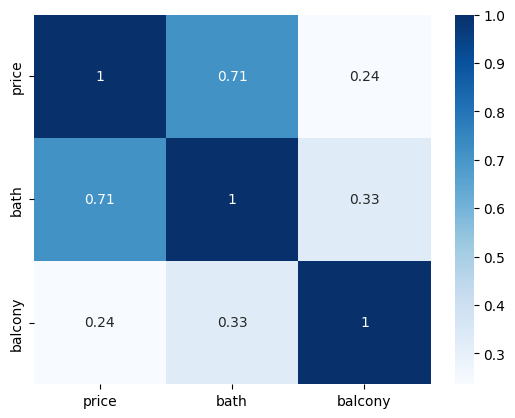

In [64]:
# generate a Correlation Heatmap for the data having fileds as price, bath, balcony

import seaborn as sns
import matplotlib.pyplot as plt
corr = data[['price','bath','balcony']].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()


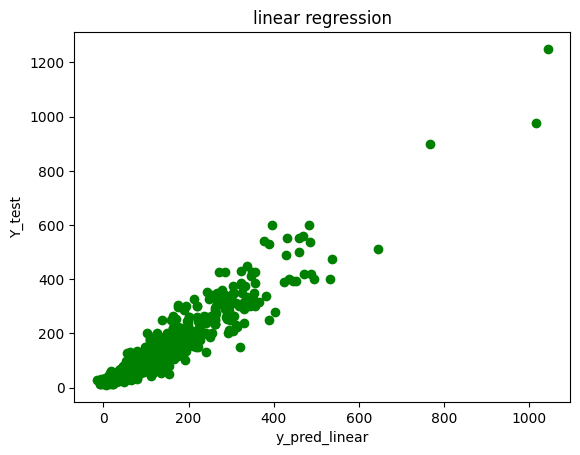

In [65]:
plt.scatter(y_pred,y_test,color='green')
plt.xlabel('y_pred_linear')
plt.ylabel('Y_test')
plt.title('linear regression')
plt.show()

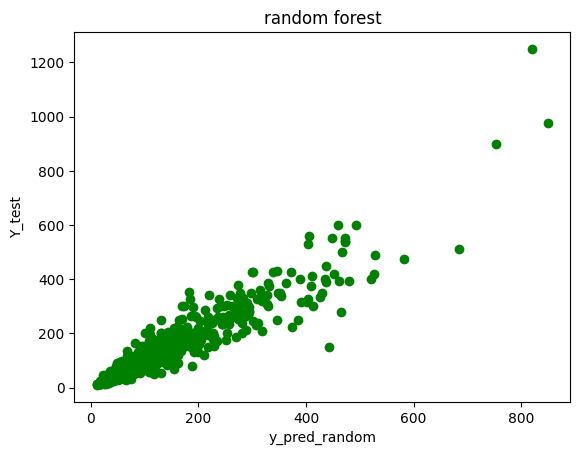

In [66]:
plt.scatter(y_pred_random,y_test,color='green')
plt.xlabel('y_pred_random')
plt.ylabel('Y_test')
plt.title('random forest')
plt.show()

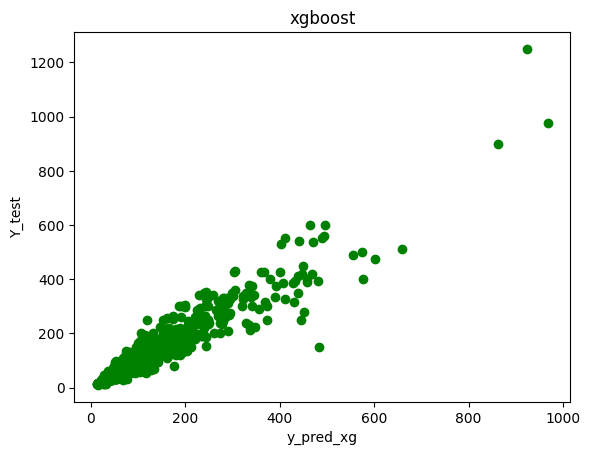

In [67]:
plt.scatter(y_pred_xg,y_test,color='green')
plt.xlabel('y_pred_xg')
plt.ylabel('Y_test')
plt.title('xgboost')
plt.show()

In [68]:
# r2_score of model used for prediction
print('r2_score of linear regression model is :',r2_score(y_test,y_pred))
print('r2_score of random forest model is :',r2_score(y_test,y_pred_random))
print('r2_score of xgboost model is :',r2_score(y_test,y_pred_xg))
print('r2_score of catboost model is :',r2_score(y_test,y_pred_cat))
print('r2_score of lasso model is :',r2_score(y_test,y_pred_lasso))
print('r2_score of ridge model is :',r2_score(y_test,y_pred_ridge))

r2_score of linear regression model is : 0.9028735900271909
r2_score of random forest model is : 0.8871132768952242
r2_score of xgboost model is : 0.9017856713320668
r2_score of catboost model is : 0.8803552239884366
r2_score of lasso model is : 0.855712088126598
r2_score of ridge model is : 0.9019806328446655


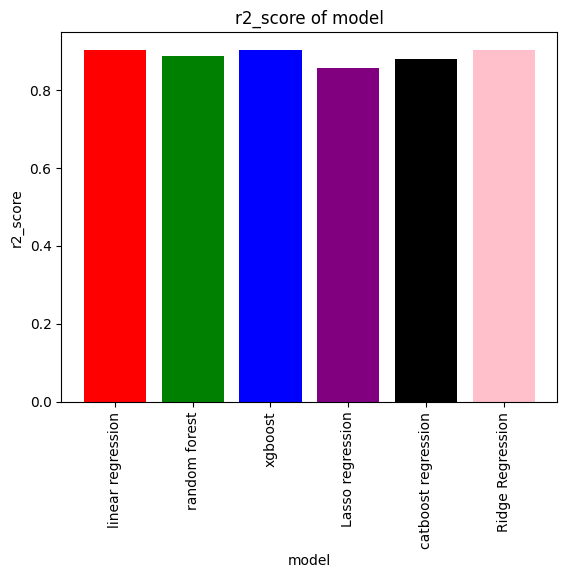

In [69]:
# bar graph of r2_score of model used for prediction
plt.bar(['linear regression','random forest','xgboost','Lasso regression','catboost regression','Ridge Regression'],
[r2_score(y_test,y_pred),r2_score(y_test,y_pred_random),
r2_score(y_test,y_pred_xg),r2_score(y_test,y_pred_lasso),r2_score(y_test,y_pred_cat),r2_score(y_test,y_pred_ridge)],
color=['red','green','blue','purple','black','pink'])
plt.xlabel('model')
plt.ylabel('r2_score')
plt.title('r2_score of model')
plt.xticks(rotation= "vertical")
plt.show()